In [1]:
pip install s3fs

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 132 kB 32.4 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 31.7 MB/s eta 0:00:01
     |████████████████████████████████| 8.1 MB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 41.4 MB/s eta 0:00:01
     |████████████████████████████████| 192 kB 54.6 MB/s eta 0:00:01
     |████████████████████████████████| 271 kB 58.5 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 59.5 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 15.7 MB/s eta 0:00:01
Using legacy 'setup.py install' for aiobotocore, since package 'wheel' is not installed.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
    Running setup.py install f

In [2]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.0 MB 30.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 40.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 57.3 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 62.3 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.2 MB 31.8 MB/s eta 0:00:01
     |████████████████████████████████| 884 kB 48.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 43.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 49.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [12]:
from pyspark.sql.functions import col,split,concat,size
import re
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import numpy 

In [2]:
data = sc.textFile("s3://geocluster/Data/devicestatus.txt")
prepareddata=data.map(lambda x: (re.split('[,|/]',x))).cache()

#LOADED THE DATA AAND USED A REGEX EXPRESSION TO SPLIT


In [3]:
prepareddata=prepareddata.filter(lambda x: len(x) == 14)
#FILTERING THE DATA WHICH IS EXACTLY = 14

In [4]:
prepareddata=prepareddata.map(lambda x:(x[12],x[13],x[0],x[1],x[2]))
#SELECTING DESIRED COLOUMNS

In [5]:
df = sqlContext.createDataFrame(data=prepareddata)
#CONVERTING INTO DATAFRAME

In [6]:
df=df.na.drop()
#DROPPING THE NULL VALUES

In [7]:
df.show(10)
#VISUALIZING

+-------------+--------------+-------------------+--------------------+--------------------+
|           _1|            _2|                 _3|                  _4|                  _5|
+-------------+--------------+-------------------+--------------------+--------------------+
|33.6894754264|-117.543308253|2014-03-15:10:10:20|       Sorrento F41L|8cc3b47e-bd01-448...|
|37.4321088904|-121.485029632|2014-03-15:10:10:20|          MeeToo 1.0|ef8c7564-0a1a-465...|
|39.4378908349|-120.938978486|2014-03-15:10:10:20|          MeeToo 1.0|23eba027-b95a-472...|
|39.3635186767|-119.400334708|2014-03-15:10:10:20|       Sorrento F41L|707daba1-5640-4d6...|
|33.1913581092|-116.448242643|2014-03-15:10:10:20|Ronin Novelty Note 1|db66fe81-aa55-43b...|
|33.8343543748|-117.330000857|2014-03-15:10:10:20|       Sorrento F41L|ffa18088-69a0-433...|
|37.3803954321|-121.840756755|2014-03-15:10:10:20|       Sorrento F33L|66d678e6-9c87-48d...|
|34.1841062345|  -117.9435329|2014-03-15:10:10:20|          MeeToo 4.1

In [8]:
df=df.select(concat('_1').alias("latitude"),concat('_2').alias("longitude"),concat('_3')
              .alias("date"),concat('_4').alias("model"),concat('_5').alias("deviceID"))
#NAMING THE COLOUMNS

In [9]:
df.show(10)
#VISUALIZING

+-------------+--------------+-------------------+--------------------+--------------------+
|     latitude|     longitude|               date|               model|            deviceID|
+-------------+--------------+-------------------+--------------------+--------------------+
|33.6894754264|-117.543308253|2014-03-15:10:10:20|       Sorrento F41L|8cc3b47e-bd01-448...|
|37.4321088904|-121.485029632|2014-03-15:10:10:20|          MeeToo 1.0|ef8c7564-0a1a-465...|
|39.4378908349|-120.938978486|2014-03-15:10:10:20|          MeeToo 1.0|23eba027-b95a-472...|
|39.3635186767|-119.400334708|2014-03-15:10:10:20|       Sorrento F41L|707daba1-5640-4d6...|
|33.1913581092|-116.448242643|2014-03-15:10:10:20|Ronin Novelty Note 1|db66fe81-aa55-43b...|
|33.8343543748|-117.330000857|2014-03-15:10:10:20|       Sorrento F41L|ffa18088-69a0-433...|
|37.3803954321|-121.840756755|2014-03-15:10:10:20|       Sorrento F33L|66d678e6-9c87-48d...|
|34.1841062345|  -117.9435329|2014-03-15:10:10:20|          MeeToo 4.1

In [13]:
df2 = df.select('latitude','longitude','date','model','deviceID',split(df.model, ' ').alias('arr'))
df=df2.select('latitude','longitude','date','model','deviceID',df2.arr[size(df2.arr)-1].alias('manufacturer'))
#SPLITING MODEL INTO MODEL AND MANUFACTURER

In [14]:
df=df.filter(df.latitude!=0)
df=df.filter(df.longitude!=0)
#SELECTING THOSE WHICH ARE NOT EQUAL TO 0

In [15]:
df.show(10)

+-------------+--------------+-------------------+--------------------+--------------------+------------+
|     latitude|     longitude|               date|               model|            deviceID|manufacturer|
+-------------+--------------+-------------------+--------------------+--------------------+------------+
|33.6894754264|-117.543308253|2014-03-15:10:10:20|       Sorrento F41L|8cc3b47e-bd01-448...|        F41L|
|37.4321088904|-121.485029632|2014-03-15:10:10:20|          MeeToo 1.0|ef8c7564-0a1a-465...|         1.0|
|39.4378908349|-120.938978486|2014-03-15:10:10:20|          MeeToo 1.0|23eba027-b95a-472...|         1.0|
|39.3635186767|-119.400334708|2014-03-15:10:10:20|       Sorrento F41L|707daba1-5640-4d6...|        F41L|
|33.1913581092|-116.448242643|2014-03-15:10:10:20|Ronin Novelty Note 1|db66fe81-aa55-43b...|           1|
|33.8343543748|-117.330000857|2014-03-15:10:10:20|       Sorrento F41L|ffa18088-69a0-433...|        F41L|
|37.3803954321|-121.840756755|2014-03-15:10:10

In [16]:
df=df.toPandas();
df.to_csv('s3://geocluster/Data/devicestatus.csv',header=None)

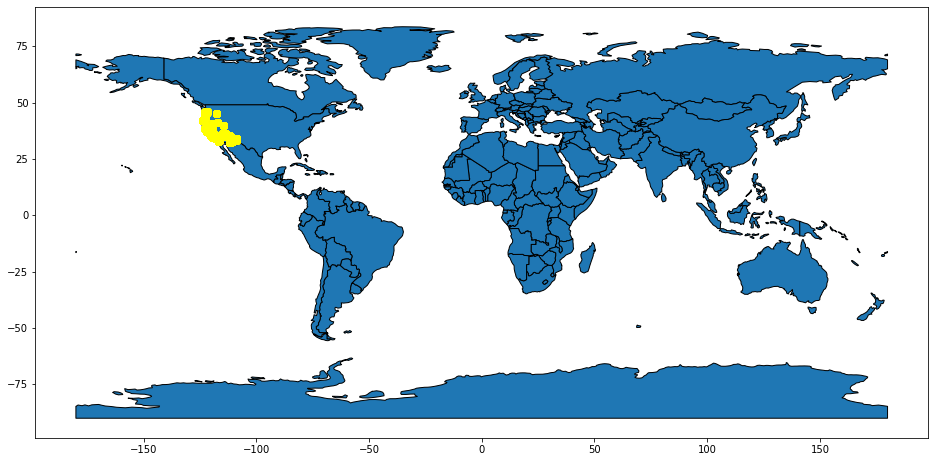

In [21]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))


world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# restricted to South America.
ax = world_map.plot(
    edgecolor='black',figsize=(16,16))

#PLOTING.
gdf.plot(ax=ax,color='yellow')

plt.show()
#VISUALIZATION